# Problem 1

In [1]:
# Load the dataset (it's classification problem where X is normalized)
import pandas as pd
import numpy as np
dataset = pd.read_csv('youngsdata.csv')

labels = dataset.columns[1:]
dataset.head()
np.random.seed(1)
dataset = dataset.values
dataset = dataset[:,1:]

np.random.shuffle(dataset)


X = dataset[:,:-1]
y = dataset[:,-1]
y = y.reshape(-1,1)


print(dataset.shape)
print(labels)
print(X.shape)

(107, 12)
Index(['Diff. Lattice Constants', 'Diff. Melting Point', 'Mixing Enthalpy',
       'Lattice Constants', 'Lambda', 'Diff. in atomic radii', 'Omega',
       'Melting Temp.', 'Diff. Electronegativity', 'Mixing Entropy',
       'Valence electron', 'Young's Mod (GPa)'],
      dtype='object')
(107, 11)


a) Split  the  dataset into training (80%) and  testing(20%)datasets using train_test_splitwith random_state = 1, then normalizethe dataset(both X and y)between0 and 1. 

In [2]:
#Split Data into training and testing + normaize 
from sklearn.model_selection import train_test_split
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [3]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [4]:
#Normalization of X
from sklearn.preprocessing import normalize

X_train_normalized = normalize(X_train, axis = 0)
X_test_normalized = normalize(X_test, axis = 0)
y_train_normalized = normalize(y_train, axis = 0)
y_test_normalized = normalize(y_test, axis = 0)

b)Fit  the  data  using  LinearRegression with  5-cross  validation  to  predict  the Young’s Modulus and report the MSE on each fold. Discuss the results and explain why we need to  use  crossvalidation on this  training  dataset  to evaluatethe  performance  of the model?

In [5]:
#Call the relevant sklearn models
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Define the cross-validation split
kfold = KFold(n_splits = 5)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
scores = cross_val_score(model, X_train_normalized, y_train_normalized, scoring = 'neg_mean_squared_error')

print("Score for k-fold:", abs(scores))

Score for k-fold: [0.00195374 0.00313561 0.00134839 0.00132957 0.00155799]


C) Fit the data using Ridge (L2) Linear Regression with 5-cross validation to predict the Young’s Modulus using regularization values equal to [0, 0.001, 0.01, 0.1,1] and report the mean and standard deviation of the MSE on the 5-fold validation sets for the different lambda values. Explain how to interprets the MSE mean and standard deviation, and which regularization value gives the best results.

In [8]:
kfold = KFold(n_splits = 5)

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

C = [0, 0.001, 0.01, 0.1, 1]

total_scores = []
mean_scores = []
stddev_scores = []

for i in range(len(C)):
    model = Ridge(alpha = C[i])
    scores = cross_val_score(model, X_train_normalized, y_train_normalized, scoring = 'neg_mean_squared_error', cv = kfold)
    total_scores.append(abs(scores))

for i in total_scores:
    mean_scores.append(np.mean(i))

for i in total_scores:
    stddev_scores.append(np.std(i))

print("Total Scores:", total_scores,"\n")
print("Mean Scores:", mean_scores, "\n")
print("Std Deviation Scores:", stddev_scores)

Total Scores: [array([0.00195374, 0.00313561, 0.00134839, 0.00132957, 0.00155799]), array([0.00230736, 0.00300003, 0.0010095 , 0.00144859, 0.00178366]), array([0.00260419, 0.00302456, 0.00084513, 0.00155866, 0.00182477]), array([0.00279182, 0.00308365, 0.00091099, 0.00147989, 0.00182184]), array([0.00289583, 0.0029308 , 0.00108881, 0.00139189, 0.00183489])] 

Mean Scores: [0.001865058384249163, 0.0019098275338596464, 0.001971460311426987, 0.0020176363971267947, 0.002028443103719146] 

Std Deviation Scores: [0.0006738168861243172, 0.0006907675450650603, 0.0007707038063824298, 0.0008109159039037443, 0.0007605502156242589]


d) Fit a neural network with 5-cross validation to predict the Young’s Modulus using dropout layer with dropout rate equal to [0, 0.05, 0.1, 0.25, 0.5] and report the mean and standard deviation of the MSE on the 5-fold validation sets for the different dropout. which dropout rate value gives the best results.

In [9]:
import keras 

from keras import Input
from keras import models
from keras import layers

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal 
from tensorflow.keras.initializers import Zeros

from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasRegressor # use KerasRegressor if you want to do regression

In [12]:
def create_model(dropout_rate):
    # create model
    model = models.Sequential()
    model.add(Input(shape = (X_train_normalized.shape[1],))) # Input layer (has cells equal to number of features)
    model.add(layers.Dense(20,activation = 'relu', kernel_initializer = GlorotNormal(), bias_initializer = Zeros())) 
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='linear', kernel_initializer = GlorotNormal(), bias_initializer = Zeros()))
    # Compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2 = 0.999, epsilon = 1e-7) # Adam with learning rate = 0.01, beta1 = 0.9, and beta2 = 0.999

    model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs = 500, batch_size = 16, verbose=1)

# define the grid search (this will be small so we don't take forever to train)

dropout_rate = [0, 0.05, 0.1, 0.25, 0.5]
param_grid = dict(dropout_rate= dropout_rate)
# param_grid = dict(neurons=neurons)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# kfold = StratifiedKFold(n_splits = 2) # I will still use cross validation
grid_result = grid.fit(X_train_normalized, y_train_normalized)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

e) Compute the number of the neural network’s parameters in part 4. You need to showthe steps of how you calculatedthe number of parameters (You can use model.summary() to confirm that you answer is correct)

In [13]:
create_model(0.25).summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


/Users/leonardospallino/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


f) Plot the neural network using both plot_model and ann_viz functions.

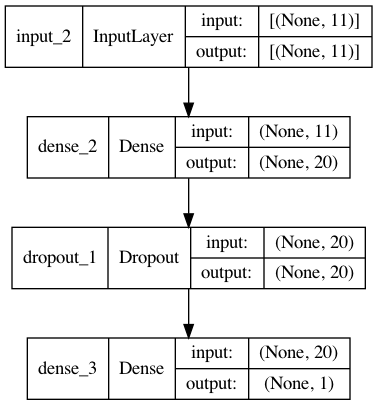

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(create_model(0.25),show_shapes=True, show_layer_names=True)

In [17]:
from ann_visualizer.visualize import ann_viz
ann_viz(create_model(0.25), title="ANN - Problem 1")

/Users/leonardospallino/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


g) Using the best hyperparameter(regularizationvalue)obtained from parts 3 and 4, train the Ridge Linear Regression and the ANN models again using all the training dataset and compute the MSE of the training and testing datasetand discuss which model is the better.

In [18]:
#Ridge Linear Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=0)
ridge_model.fit(X_train_normalized, y_train_normalized)

y_pred_train = ridge_model.predict(X_train_normalized)
y_pred_test = ridge_model.predict(X_test_normalized)

train_MSE = mean_squared_error(y_train_normalized, y_pred_train)
test_MSE = mean_squared_error(y_test_normalized, y_pred_test)
print("Train MSE:", train_MSE)
print("Test MSE:", test_MSE)

Train MSE: 0.0013132828721542
Test MSE: 0.08379362024068204


In [19]:
#ANN Model
import keras 

from keras import Input
from keras import models
from keras import layers

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal 
from tensorflow.keras.initializers import Zeros


from keras.wrappers.scikit_learn import KerasRegressor # use KerasRegressor if you want to do regression

In [20]:
# create model
model = models.Sequential()
model.add(Input(shape = (X_train_normalized.shape[1],))) # Input layer (has cells equal to number of features)
model.add(layers.Dense(20,activation = 'relu', kernel_initializer = GlorotNormal(), bias_initializer = Zeros())) 
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='linear', kernel_initializer = GlorotNormal(), bias_initializer = Zeros()))
# Compile model
opt = Adam(learning_rate = 0.001, beta_1=0.9, beta_2 = 0.999, epsilon = 1e-7) # Adam with learning rate = 0.01, beta1 = 0.9, and beta2 = 0.999

model.compile(loss='mse', optimizer=opt, metrics=['mse'])
model.fit(X_train_normalized, y_train_normalized, epochs = 500, batch_size = 16, verbose=1)

Epoch 1/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0098 - mse: 0.0098
Epoch 2/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0082 - mse: 0.0082
Epoch 3/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0082 - mse: 0.0082
Epoch 4/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0074 - mse: 0.0074
Epoch 5/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0063 - mse: 0.0063
Epoch 6/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0068 - mse: 0.0068
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0058 - mse: 0.0058
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0061 - mse: 0.0061
Epoch 9/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051
Epoch 10/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043
Epoch 11/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0064 

In [21]:
#Predicted y-values
y_train_pred_ANN = model.predict(X_train_normalized)
y_test_pred_ANN = model.predict(X_test_normalized)

#Mean Squared Error
train_MSE_ANN = mean_squared_error(y_train_normalized, y_train_pred_ANN)
test_MSE_ANN = mean_squared_error(y_test_normalized, y_test_pred_ANN)
print("Train MSE:", train_MSE_ANN)
print("Test MSE:", test_MSE_ANN)

Train MSE: 0.0013926347522329394
Test MSE: 0.006577504433403098


In [22]:
#Summary
print("Ridge Model:")
print("Train MSE:", train_MSE)
print("Test MSE:", test_MSE)
print("")
print("ANN Model")
print("Train MSE:", train_MSE_ANN)
print("Test MSE:", test_MSE_ANN)

Ridge Model:
Train MSE: 0.0013132828721542
Test MSE: 0.08379362024068204

ANN Model
Train MSE: 0.0013926347522329394
Test MSE: 0.006577504433403098


# Problem 2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
# You need to change the line below based on your directory of where the data
data_dir = R"C:\Users\Mahir Jalanko\OneDrive - McMaster University\Desktop\Course Taught\MATLS 4ML3\Assignments\Assignment 4\GarbageDataset\Garbage classification\Garbage classification"


In [ ]:
# this code will look into the name of files in that directory (the name of classes)
labels = os.listdir(data_dir)
labels

In [ ]:
# this code will show you how many images in each class
for label in labels:
    directory = os.path.join(data_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

In [ ]:
# This code will store all the images in X and all the labels in y 
X = np.zeros((2527,384,512,3))
y = np.zeros((2527,1))
counter = 0
for L in range(len(labels)):
    directory = os.path.join(data_dir, labels[L])
    for j in range(len(os.listdir(directory))):
        X[counter][:][:][:] = mpimg.imread(os.path.join(directory, os.listdir(directory)[j]))
        y[counter] = L
        counter = counter + 1

X = X.astype('int')
y = y.astype('int')


In [ ]:
# Use this code instead of the code in the cell above starting from part 2 and after 
# This code will store all resized images in X and all the labels in y
import cv2
X = np.zeros((2527,96,128,3))
y = np.zeros((2527,1))
counter = 0
for L in range(len(labels)):
    directory = os.path.join(data_dir, labels[L])
    for j in range(len(os.listdir(directory))):
        img = cv2.imread(os.path.join(directory, os.listdir(directory)[j]))
        res = cv2.resize(img,dsize=(128,96), interpolation=cv2.INTER_CUBIC)
        X[counter][:][:][:] = res
        y[counter] = L
        counter = counter + 1

X = X.astype('int')
y = y.astype('int')